Reporter Model Test Accuracy: 1.00
Classification Report for ReporterName:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2541
           1       1.00      1.00      1.00      2614
           2       1.00      1.00      1.00      2564
           3       1.00      1.00      1.00      2596
           4       1.00      1.00      1.00      2557
           5       0.99      0.99      0.99      2651
           6       1.00      1.00      1.00      2619
           7       1.00      1.00      1.00      2539
           8       1.00      1.00      1.00      2648
           9       1.00      1.00      1.00      2536
          10       1.00      1.00      1.00      2548
          11       0.99      0.99      0.99      2591
          12       1.00      1.00      1.00      2545
          13       1.00      1.00      1.00      2540
          14       1.00      1.00      1.00      2566
          15       1.00      1.00      1.00      2614
     

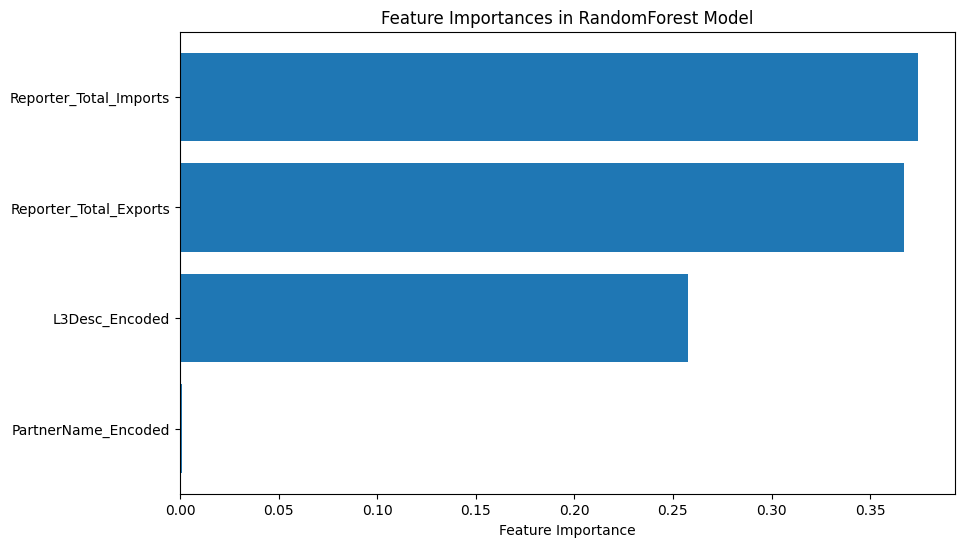

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Load the dataset and take the first 10,000 rows
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'
data = pd.read_csv(file_path)

# Define numerical and categorical columns
numerical_cols = [
    'Reporter_Total_Imports', 'Reporter_Total_Exports',
]
categorical_cols = ['L3Desc', 'PartnerName']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Encode categorical features
label_encoders = {}
for col in categorical_cols + ['ReporterName']:
    label_encoders[col] = LabelEncoder()
    data[col + '_Encoded'] = label_encoders[col].fit_transform(data[col])

# Combine numerical and encoded categorical columns for features
encoded_categorical_cols = [col + '_Encoded' for col in categorical_cols]
features = numerical_cols + encoded_categorical_cols

# Define feature matrix (X) and target variable (y)
X = data[features]
y = data['ReporterName_Encoded']  # Use the encoded reporter name as the target


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reporter_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
reporter_model.fit(X_train, y_train)

# Save the model
dump(reporter_model, 'reporter_model_rf.joblib')
dump(label_encoders['ReporterName'], 'reporter_label_encoder.joblib')

# Evaluate the model on the test set
y_pred = reporter_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Reporter Model Test Accuracy: {test_accuracy:.2f}')
print("Classification Report for ReporterName:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

importances = reporter_model.feature_importances_
feature_names = features
sorted_indices = importances.argsort()

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in RandomForest Model')
plt.show()



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Load the dataset and take the first 10,000 rows
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'
data = pd.read_csv(file_path)

# Define numerical and categorical columns
numerical_cols = [
    'Reporter_Total_Imports', 'Reporter_Total_Exports',
    'Partner_Total_Imports', 'Partner_Total_Exports', 'Year'
]
categorical_cols = ['L3Desc', 'ReporterName']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Encode categorical features
label_encoders = {}
for col in categorical_cols + ['PartnerName']:
    label_encoders[col] = LabelEncoder()
    data[col + '_Encoded'] = label_encoders[col].fit_transform(data[col])

# Combine numerical and encoded categorical columns for features
encoded_categorical_cols = [col + '_Encoded' for col in categorical_cols]
features = numerical_cols + encoded_categorical_cols

# Define feature matrix (X) and target variable (y)
X = data[features]
y = data['PartnerName_Encoded']  # Use the encoded reporter name as the target

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reporter_model = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
reporter_model.fit(X_train, y_train)

# Save the model
dump(reporter_model, 'partner_model_rf.joblib')
dump(label_encoders['PartnerName'], 'partner_label_encoder.joblib')

# Evaluate the model on the test set
y_pred = reporter_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Partner Model Test Accuracy: {test_accuracy:.2f}')
print("Classification Report for PartnerName:\n", classification_report(y_test, y_pred))


Partner Model Test Accuracy: 0.86
Classification Report for PartnerName:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1934
           1       0.83      0.88      0.85      2005
           2       0.87      0.91      0.89      1994
           3       0.82      0.89      0.85      2039
           4       0.77      0.81      0.79      1928
           5       0.85      0.93      0.89      1955
           6       0.82      0.89      0.85      2002
           7       0.89      0.95      0.92      1936
           8       0.81      0.92      0.86      1900
           9       0.84      0.91      0.88      1955
          10       0.79      0.84      0.81      2023
          11       0.84      0.90      0.87      1968
          12       0.89      0.92      0.90      1941
          13       0.84      0.87      0.85      2012
          14       0.80      0.89      0.85      1882
          15       0.85      0.91      0.88      1930
       

In [2]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump
import pandas as pd

# Load the dataset to get the structure
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'
data = pd.read_csv(file_path)

# Create and fit the label encoder for the 'L3Desc' (Product) column
product_label_encoder = LabelEncoder()
data['L3Desc_Encoded'] = product_label_encoder.fit_transform(data['L3Desc'])

# Save the encoder
dump(product_label_encoder, 'product_label_encoder.joblib')
print("Product label encoder saved.")


Product label encoder saved.


In [13]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from joblib import load
import numpy as np

# Load the saved models and label encoders
partner_model = load('partner_model_rf.joblib')
partner_label_encoder = load('partner_label_encoder.joblib')
reporter_label_encoder = load('reporter_label_encoder.joblib')
product_label_encoder = load('product_label_encoder.joblib')
print("Models and encoders loaded.")

# Load a portion of the dataset to get structure and potentially retrieve realistic data points
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'
data = pd.read_csv(file_path)  # Load a sample

# Define the complete feature list as used during training
feature_list = [
    'Reporter_Total_Imports', 'Reporter_Total_Exports',
    'Partner_Total_Imports', 'Partner_Total_Exports', 'Year',
    'L3Desc_Encoded', 'ReporterName_Encoded'
]

# Create dropdown widgets for user inputs
country_dropdown = widgets.Dropdown(
    options=reporter_label_encoder.classes_,
    description='Your Country:',
    disabled=False,
)

trade_type = widgets.RadioButtons(
    options=['Import', 'Export'],
    description='Trade Type:',
    disabled=False,
)

product_dropdown = widgets.Dropdown(
    options=product_label_encoder.classes_,
    description='Product:',
    disabled=False,
)

# Create a button to trigger the prediction
predict_button = widgets.Button(
    description='Get Recommendations',
    disabled=False,
    button_style='success',
    tooltip='Click to get top 5 countries for export/import',
)

# Function to predict top 5 countries for selected inputs
def predict_top_5_countries(button):
    # Get user inputs
    selected_country = country_dropdown.value
    selected_trade_type = trade_type.value
    selected_product = product_dropdown.value
    
    # Encode user inputs
    encoded_country = reporter_label_encoder.transform([selected_country])[0]
    encoded_product = product_label_encoder.transform([selected_product])[0]

    # Handle logic based on trade type
    if selected_trade_type == 'Export':
        # EXPORT LOGIC: Predict the best partner countries for exporting the product
        product_data = data[data['L3Desc'] == selected_product]  # Filter data by product
        partner_imports = product_data.groupby('PartnerName')['Partner_Total_Imports'].sum().sort_values(ascending=False)  # Rank by imports
        top_partners = partner_imports.index[:5]  # Get top 5 importing countries

        # Display results
        print(f"\nTop 5 countries to export {selected_product} from {selected_country}:")
        for partner in top_partners:
            print(f"{partner}: {partner_imports[partner]:.2f} total imports of {selected_product}")

    elif selected_trade_type == 'Import':
        # IMPORT LOGIC: Predict the best partner countries for importing the product

        # Step 1: Find the countries that export the most of the selected product to other countries
        product_data = data[data['L3Desc'] == selected_product]  # Filter data by product
        partner_exports = product_data.groupby('PartnerName')['Partner_Total_Exports'].sum().sort_values(ascending=False)  # Rank by exports
        top_partners = partner_exports.index[:5]  # Get top 5 exporting countries

        # Display results
        print(f"\nTop 5 countries to import {selected_product} to {selected_country}:")
        for partner in top_partners:
            print(f"{partner}: {partner_exports[partner]:.2f} total exports of {selected_product}")

# Attach the function to the button click event
predict_button.on_click(predict_top_5_countries)

# Display the widgets for user input
display(country_dropdown, trade_type, product_dropdown, predict_button)


Models and encoders loaded.


Dropdown(description='Your Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Ar…

RadioButtons(description='Trade Type:', options=('Import', 'Export'), value='Import')

Dropdown(description='Product:', options=('Aircraft', 'All Products', 'Animal fats', 'Animal feeds and other o…

Button(button_style='success', description='Get Recommendations', style=ButtonStyle(), tooltip='Click to get t…


Top 5 countries to import Cereals to Afghanistan:
USA: 3147576975317.43 total exports of Cereals
Argentina: 1722076375411.65 total exports of Cereals
European Union: 1475487012336.89 total exports of Cereals
Russian Federation: 1357823145555.81 total exports of Cereals
Ukraine: 1342581778898.21 total exports of Cereals

Top 5 countries to export Cereals from Afghanistan:
China: 1394269441500.00 total imports of Cereals
Japan: 1035850472800.00 total imports of Cereals
Mexico: 760254070810.00 total imports of Cereals
European Union: 704324090904.85 total imports of Cereals
Egypt: 646400577550.00 total imports of Cereals

Top 5 countries to export Cheese from Afghanistan:
Germany: 656743074723.00 total imports of Cheese
Italy: 274683760146.00 total imports of Cheese
France: 268326687360.00 total imports of Cheese
United Kingdom: 261741842830.00 total imports of Cheese
USA: 199847628240.00 total imports of Cheese

Top 5 countries to import Cocoa to Afghanistan:
European Union: 90898622575

In [15]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from joblib import load
import numpy as np

# Load the saved models and label encoders
partner_model = load('partner_model_rf.joblib')
partner_label_encoder = load('partner_label_encoder.joblib')
reporter_label_encoder = load('reporter_label_encoder.joblib')
product_label_encoder = load('product_label_encoder.joblib')
print("Models and encoders loaded.")

# Load a portion of the dataset to get structure and potentially retrieve realistic data points
file_path = '/Users/selma/Downloads/tradeconnectivity/merged_data.csv'
data = pd.read_csv(file_path)  # Load a sample

# Define the complete feature list as used during training
feature_list = [
    'Reporter_Total_Imports', 'Reporter_Total_Exports',
    'Partner_Total_Imports', 'Partner_Total_Exports', 'Year',
    'L3Desc_Encoded', 'ReporterName_Encoded'
]

# Create dropdown widgets for user inputs
country_dropdown = widgets.Dropdown(
    options=reporter_label_encoder.classes_,
    description='Your Country:',
    disabled=False,
)

trade_type = widgets.RadioButtons(
    options=['Import', 'Export'],
    description='Trade Type:',
    disabled=False,
)

product_dropdown = widgets.Dropdown(
    options=product_label_encoder.classes_,
    description='Product:',
    disabled=False,
)

# Create a button to trigger the prediction
predict_button = widgets.Button(
    description='Get Recommendations',
    disabled=False,
    button_style='success',
    tooltip='Click to get top 5 countries for export/import',
)

# Function to predict top 5 countries for selected inputs
def predict_top_5_countries(button):
    # Get user inputs
    selected_country = country_dropdown.value
    selected_trade_type = trade_type.value
    selected_product = product_dropdown.value
    
    # Encode user inputs
    encoded_country = reporter_label_encoder.transform([selected_country])[0]
    encoded_product = product_label_encoder.transform([selected_product])[0]

    # Fetch realistic trade values for the country (you can replace this with actual trade data)
    country_data = data[data['ReporterName'] == selected_country]
    reporter_imports = country_data['Reporter_Total_Imports'].mean() if not country_data.empty else 0
    reporter_exports = country_data['Reporter_Total_Exports'].mean() if not country_data.empty else 0

    # Create the feature set based on the trade type
    if selected_trade_type == 'Export':
        # EXPORT LOGIC: Use the model to predict the best countries to export the product
        input_data = {
            'Reporter_Total_Imports': 0,  # Placeholder for import during export
            'Reporter_Total_Exports': reporter_exports,  # Actual export data
            'Partner_Total_Imports': 0,  # Placeholder for partner country imports
            'Partner_Total_Exports': 0,  # Placeholder for partner country exports
            'Year': 2024,  # Use current year or other logic
            'L3Desc_Encoded': encoded_product,
            'ReporterName_Encoded': encoded_country
        }
    elif selected_trade_type == 'Import':
        # IMPORT LOGIC: Use the model to predict the best countries to import the product from
        input_data = {
            'Reporter_Total_Imports': reporter_imports,  # Actual import data
            'Reporter_Total_Exports': 0,  # Placeholder for export during import
            'Partner_Total_Imports': 0,  # Placeholder for partner country imports
            'Partner_Total_Exports': 0,  # Placeholder for partner country exports
            'Year': 2024,  # Use current year or other logic
            'L3Desc_Encoded': encoded_product,
            'ReporterName_Encoded': encoded_country
        }

    # Convert to DataFrame and ensure it has all columns used in training
    input_df = pd.DataFrame([input_data])
    input_df = input_df[feature_list]  # Ensure the order and presence of all features

    # Use the model to predict probabilities for the top countries
    probabilities = partner_model.predict_proba(input_df)[0]
    
    # Get top 5 countries with the highest probabilities
    top_5_indices = np.argsort(probabilities)[-5:][::-1]
    top_5_countries = partner_label_encoder.inverse_transform(top_5_indices)
    top_5_probabilities = probabilities[top_5_indices]

    # Display results
    print(f"\nTop 5 recommended countries for {selected_country} to {selected_trade_type.lower()} {selected_product}:")
    for country, prob in zip(top_5_countries, top_5_probabilities):
        print(f"{country}: {prob:.2f} probability")

# Attach the function to the button click event
predict_button.on_click(predict_top_5_countries)

# Display the widgets for user input
display(country_dropdown, trade_type, product_dropdown, predict_button)


Models and encoders loaded.


Dropdown(description='Your Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Ar…

RadioButtons(description='Trade Type:', options=('Import', 'Export'), value='Import')

Dropdown(description='Product:', options=('Aircraft', 'All Products', 'Animal fats', 'Animal feeds and other o…

Button(button_style='success', description='Get Recommendations', style=ButtonStyle(), tooltip='Click to get t…


Top 5 recommended countries for Afghanistan to import Aircraft:
Switzerland: 0.10 probability
Austria: 0.10 probability
Greece: 0.10 probability
Slovenia: 0.10 probability
Thailand: 0.10 probability


/Users/selma/anaconda3/envs/da/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Top 5 recommended countries for Afghanistan to export Aircraft:
Switzerland: 0.10 probability
Denmark: 0.10 probability
Viet Nam: 0.10 probability
Kazakhstan: 0.10 probability
South Africa: 0.10 probability


/Users/selma/anaconda3/envs/da/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Top 5 recommended countries for Armenia to export Aircraft:
South Africa: 0.20 probability
Singapore: 0.10 probability
Denmark: 0.10 probability
Taipei, Chinese: 0.10 probability
Benin: 0.10 probability


/Users/selma/anaconda3/envs/da/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
